In [7]:
import warnings
import numpy as np
import numba
import matplotlib.pyplot as plt
from coffea.nanoevents import NanoEventsFactory
import pandas as pd
import json

In [2]:
fn = "VBF_SMEFTsim_topU3l_123.root"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    events = NanoEventsFactory.from_root(fn).events()

350


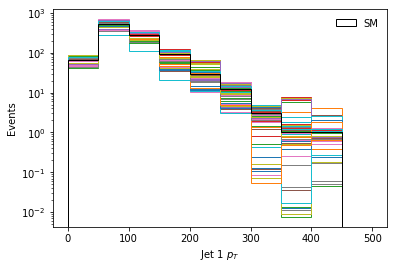

In [39]:
bins=np.linspace(0,500,11)

print(len(events.LHEReweightingWeight[0]))

#plt.hist(events.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,11),label='SM',color='black')

for i in range(len(events.LHEReweightingWeight[0])):
    #print(events.LHEReweightingWeight[:,i])
    plt.hist(events.GenJet.pt[:,0:1],weights=events.LHEReweightingWeight[:,i],histtype='step',bins=np.linspace(0,500,11))

plt.hist(events.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,11),label='SM',color='black')
plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'Jet 1 $p_T$')

plt.legend(frameon=False)

In [8]:
with open('dictionary.json') as f:
    d = json.load(f)

In [44]:
def weight_names(reweight_card):
    
    array = []
    
    weight_index = 0
    
    with open(reweight_card, "r+") as file1:
        for line in file1.readlines():
            
            if 'launch' in line:
                weight_index += 1
                continue
                
            if 'rwgt' in line:
                continue
                
            array += [[weight_index]+line.split()[1:]]
            
        # Reading from a file
        #whole_file = file1.read()
        
    #points = whole_file.split('\n')
    #print(points)
    
    
    #df = pd.read_csv(reweight_card,sep=' ',skiprows=1,header=None,usecols=[1,2,3])
    #df = df[df[3]>0]
    #print(df)
    
    
    df = pd.DataFrame(array,columns=['weight_index','model','param_index','value'])
    df['value'] = df['value'].astype('float')
    df = df[df['value']>0]
    
    param_name = []
    for index, row in df.iterrows():
        param_name += [d[row['model']][row['param_index']]]
    
    df['param_name'] = param_name

    
    df['weight_name'] = df['param_name']+"="+df['value'].astype('string')
    
    names = []
    for i in np.unique(df['weight_index']):
        name = ""
        for n in df[df['weight_index']==i]["weight_name"]:
            if len(name)>0:
                name += ","
            name += n
        names += [name]

    return names

def param_names(reweight_card):
    df = pd.read_csv(reweight_card,sep=' ',skiprows=2,header=None)
    print(df)
    #df = df[[1,2,3]][(df[1]=="SMEFT") | (df[1]=="SMEFTcpv")].drop_duplicates()

In [45]:
names = weight_names("VBF_SMEFTsim_topU3l_reweight_card.dat")

350


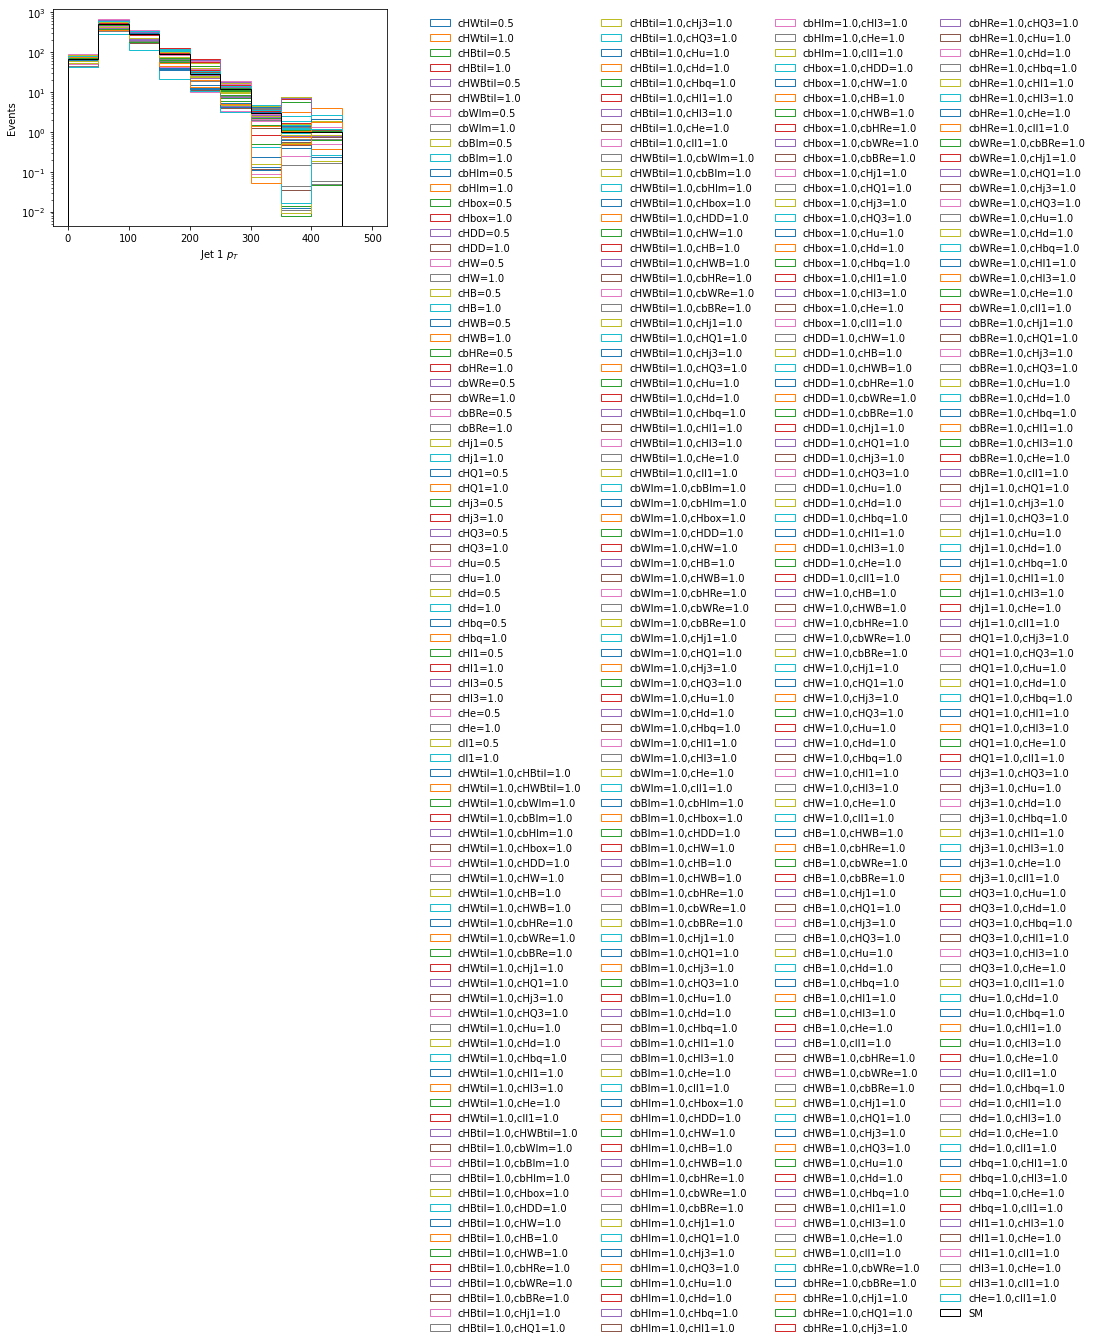

In [46]:
bins=np.linspace(0,500,11)

print(len(events.LHEReweightingWeight[0]))

for i in range(len(events.LHEReweightingWeight[0])):
    #print(events.LHEReweightingWeight[:,i])
    plt.hist(events.GenJet.pt[:,0:1],weights=events.LHEReweightingWeight[:,i],histtype='step',bins=np.linspace(0,500,11),label=names[i])

plt.hist(events.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,11),label='SM',color='black')
plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'Jet 1 $p_T$')

plt.legend(frameon=False,bbox_to_anchor=(1.1, 1),ncol=4)

350


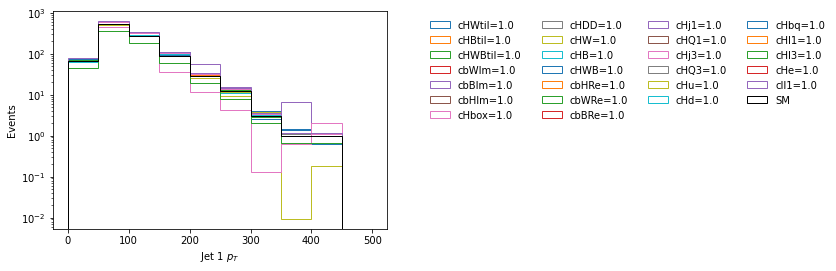

In [48]:
bins=np.linspace(0,500,11)

print(len(events.LHEReweightingWeight[0]))

for i in range(len(events.LHEReweightingWeight[0])):
    if ',' in names[i] or '0.5' in names[i]:
        continue
    plt.hist(events.GenJet.pt[:,0:1],weights=events.LHEReweightingWeight[:,i],histtype='step',bins=np.linspace(0,500,11),label=names[i])

plt.hist(events.GenJet.pt[:,0:1],histtype='step',bins=np.linspace(0,500,11),label='SM',color='black')
plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'Jet 1 $p_T$')

plt.legend(frameon=False,bbox_to_anchor=(1.1, 1),ncol=4)